<a href="https://colab.research.google.com/github/siheon0411/Deep-Learning/blob/main/Training_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training

We now have a model and a loss function which we can use to judge how good that model is.  It's time to put the "learning" into machine learning.

Learning involves finding the parameters that minimize the loss.  That might seems like it's not too hard, but modern models might have billions of parameters.  There's an exponential number of possible parameter combinations, and there's no way we can make any progress with exhaustive search.

We'll build this up in stages.  In this practical, we'll just consider 1D search using a bracketing approach.  In part II, we'll extend to fitting the linear regression model (which has a convex loss function).  Then in part III, we'll consider non-convex loss functions


In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Let's create a simple 1D function
def loss_function(phi):
  return 1- 0.5 * np.exp(-(phi-0.65)*(phi-0.65)/0.1) - 0.45 *np.exp(-(phi-0.35)*(phi-0.35)/0.02)

def draw_function(loss_function,a=None, b=None, c=None, d=None):
  # Plot the function
  phi_plot = np.arange(0,1,0.01);
  fig,ax = plt.subplots()
  ax.plot(phi_plot,loss_function(phi_plot),'r-')
  ax.set_xlim(0,1); ax.set_ylim(0,1)
  ax.set_xlabel('$\phi$'); ax.set_ylabel('$L[\phi]$')
  if a is not None and b is not None and c is not None and d is not None:
      plt.axvspan(a, d, facecolor='k', alpha=0.2)
      ax.plot([a,a],[0,1],'b-')
      ax.plot([b,b],[0,1],'b-')
      ax.plot([c,c],[0,1],'b-')
      ax.plot([d,d],[0,1],'b-')
  plt.show()


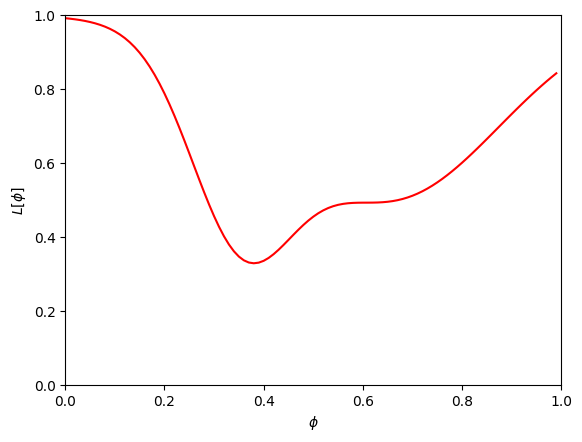

In [3]:
# Draw this function
draw_function(loss_function)

Now lets create a line search procedure to find the minimum in the range 0,1

In [4]:
def line_search(loss_function, thresh=.0001, max_iter = 10, draw_flag = False):

    # Initialize four points along the range we are going to search
    a = 0
    b = 0.33
    c = 0.66
    d = 1.0
    n_iter  =0;

    # While we haven't found the minimum closely enough
    while np.abs(b-c) > thresh and n_iter < max_iter:
        # Increment iteration counter (just to prevent an infinite loop)
        n_iter = n_iter+1
        # Calculate all four points
        lossa = loss_function(a)
        lossb = loss_function(b)
        lossc = loss_function(c)
        lossd = loss_function(d)

        if draw_flag:
          draw_function(loss_function, a,b,c,d)

        print('Iter %d, a=%3.3f, b=%3.3f, c=%3.3f, d=%3.3f'%(n_iter, a,b,c,d))

        # Rule #1 If point A is less than points B, C, and D then halve values of B,C, and D
        # i.e. bring them closer to the original point
        # TODO REPLACE THE BLOCK OF CODE BELOW WITH THIS RULE
        if (0):
          continue;

        # Rule #2 If point b is less than point c then
        #                     then point d becomes point c, and
        #                     point b becomes 1/3 between a and new d
        #                     point c beocome 2/3 between a and new d
        # TODO REPLACE THE BLOCK OF CODE BELOW WITH THIS RULE
        if (0):
          continue;

        # Rule #3 If point c is less than point b then
        #                     then point a becomes point b, and
        #                     point b becomes 1/3 between new a and d
        #                     point c beocome 2/3 between new a and d
        # TODO REPLACE THE BLOCK OF CODE BELOW WITH THIS RULE
        if(0):
          continue


    # TODO -- FINAL SOLUTION IS AVERAGE OF B and C
    # REPLACE THIS LINE
    soln = 1

    return soln

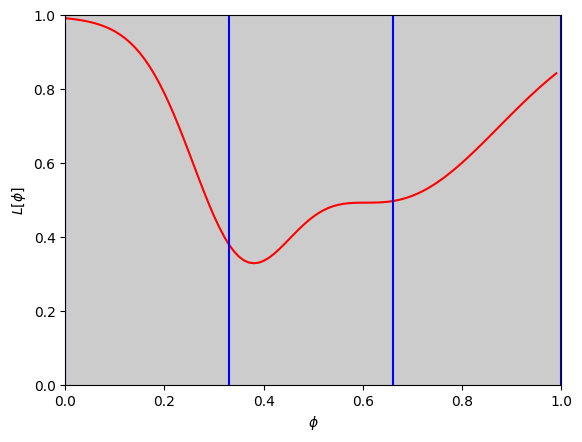

Iter 1, a=0.000, b=0.330, c=0.660, d=1.000


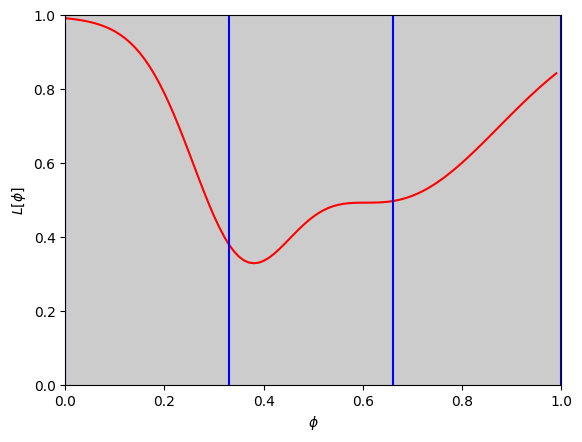

Iter 2, a=0.000, b=0.330, c=0.660, d=1.000


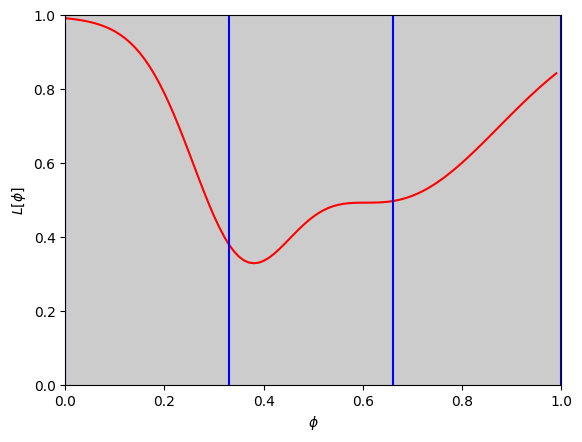

Iter 3, a=0.000, b=0.330, c=0.660, d=1.000


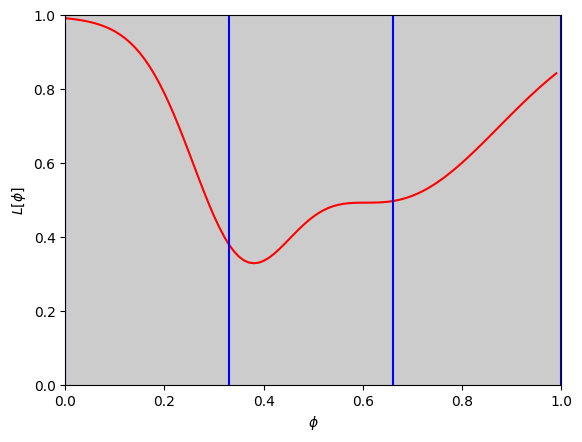

Iter 4, a=0.000, b=0.330, c=0.660, d=1.000


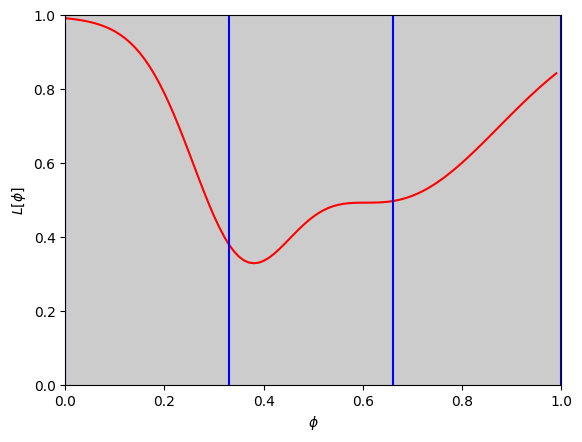

Iter 5, a=0.000, b=0.330, c=0.660, d=1.000


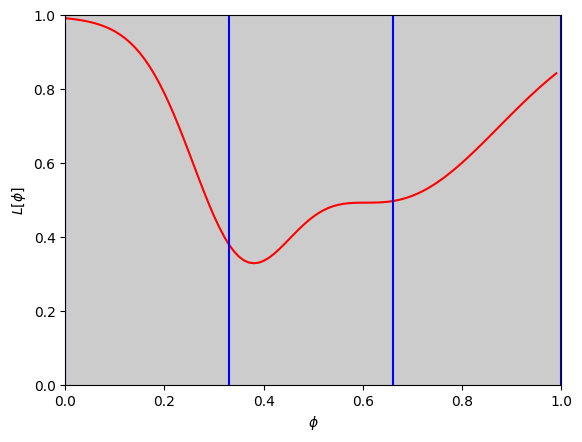

Iter 6, a=0.000, b=0.330, c=0.660, d=1.000


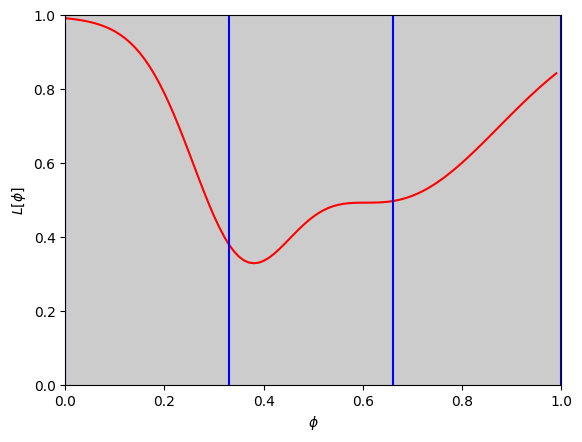

Iter 7, a=0.000, b=0.330, c=0.660, d=1.000


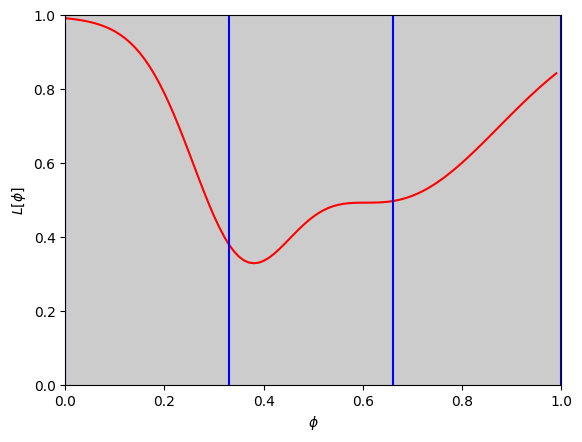

Iter 8, a=0.000, b=0.330, c=0.660, d=1.000


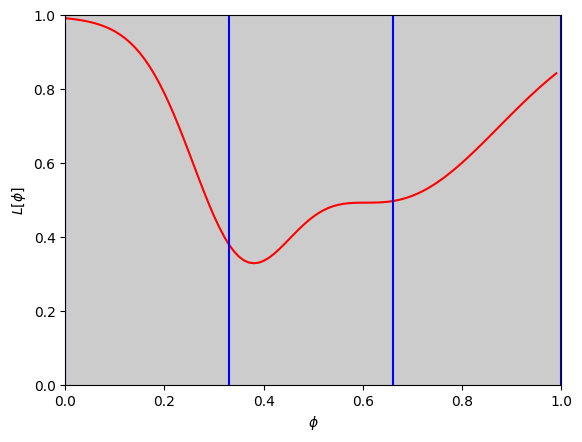

Iter 9, a=0.000, b=0.330, c=0.660, d=1.000


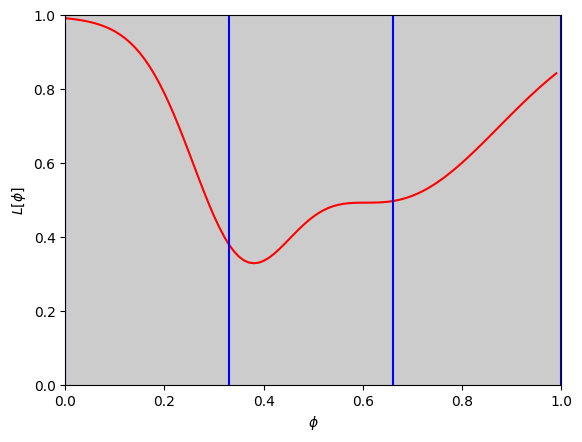

Iter 10, a=0.000, b=0.330, c=0.660, d=1.000
Soln = 1.000, loss = 0.853


In [5]:
soln = line_search(loss_function, draw_flag=True)
print('Soln = %3.3f, loss = %3.3f'%(soln,loss_function(soln)))